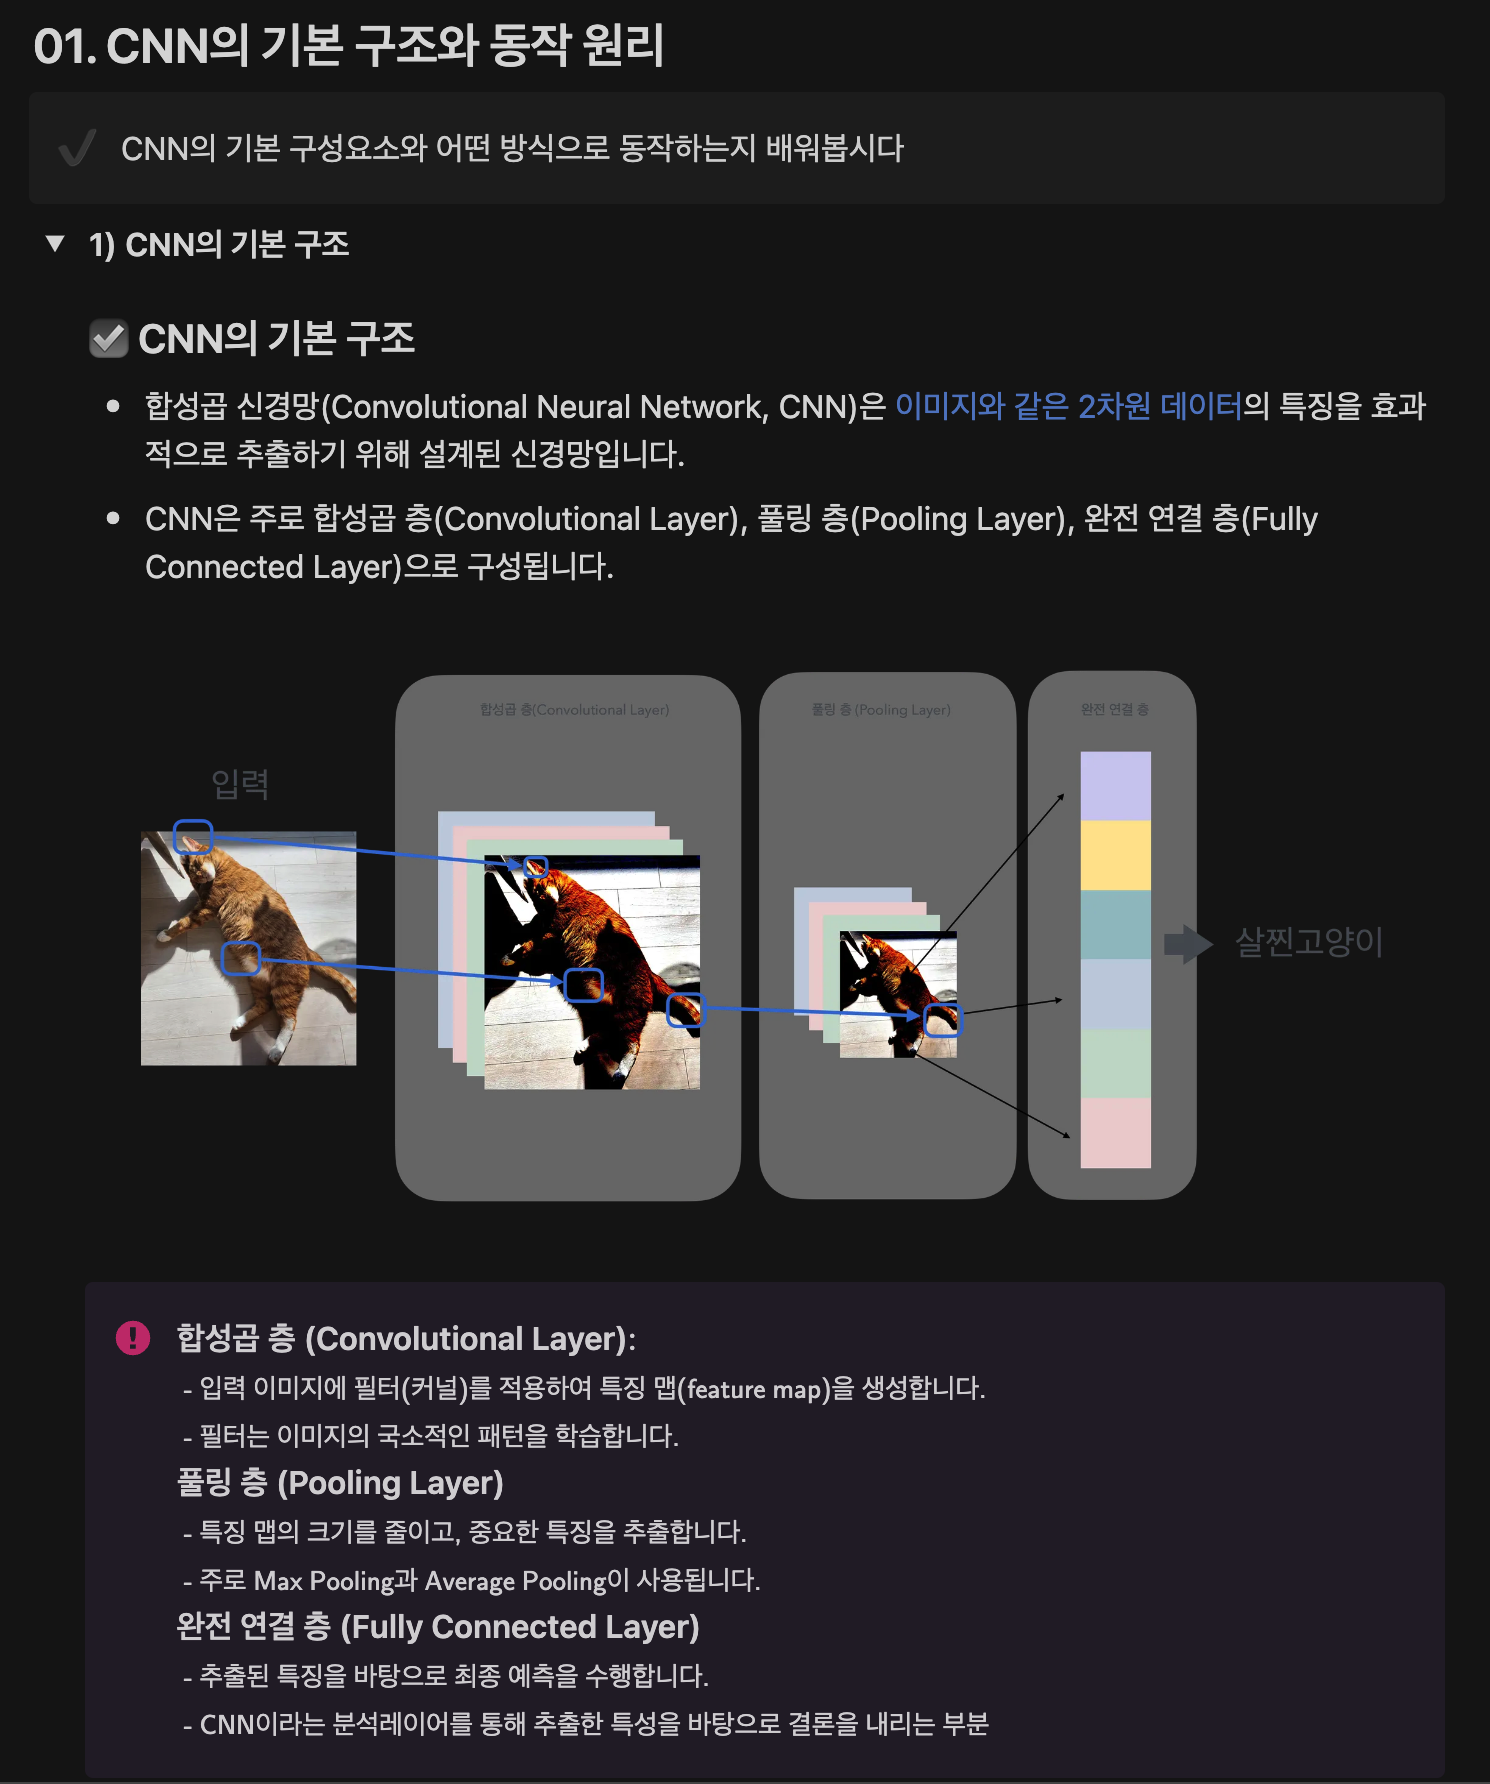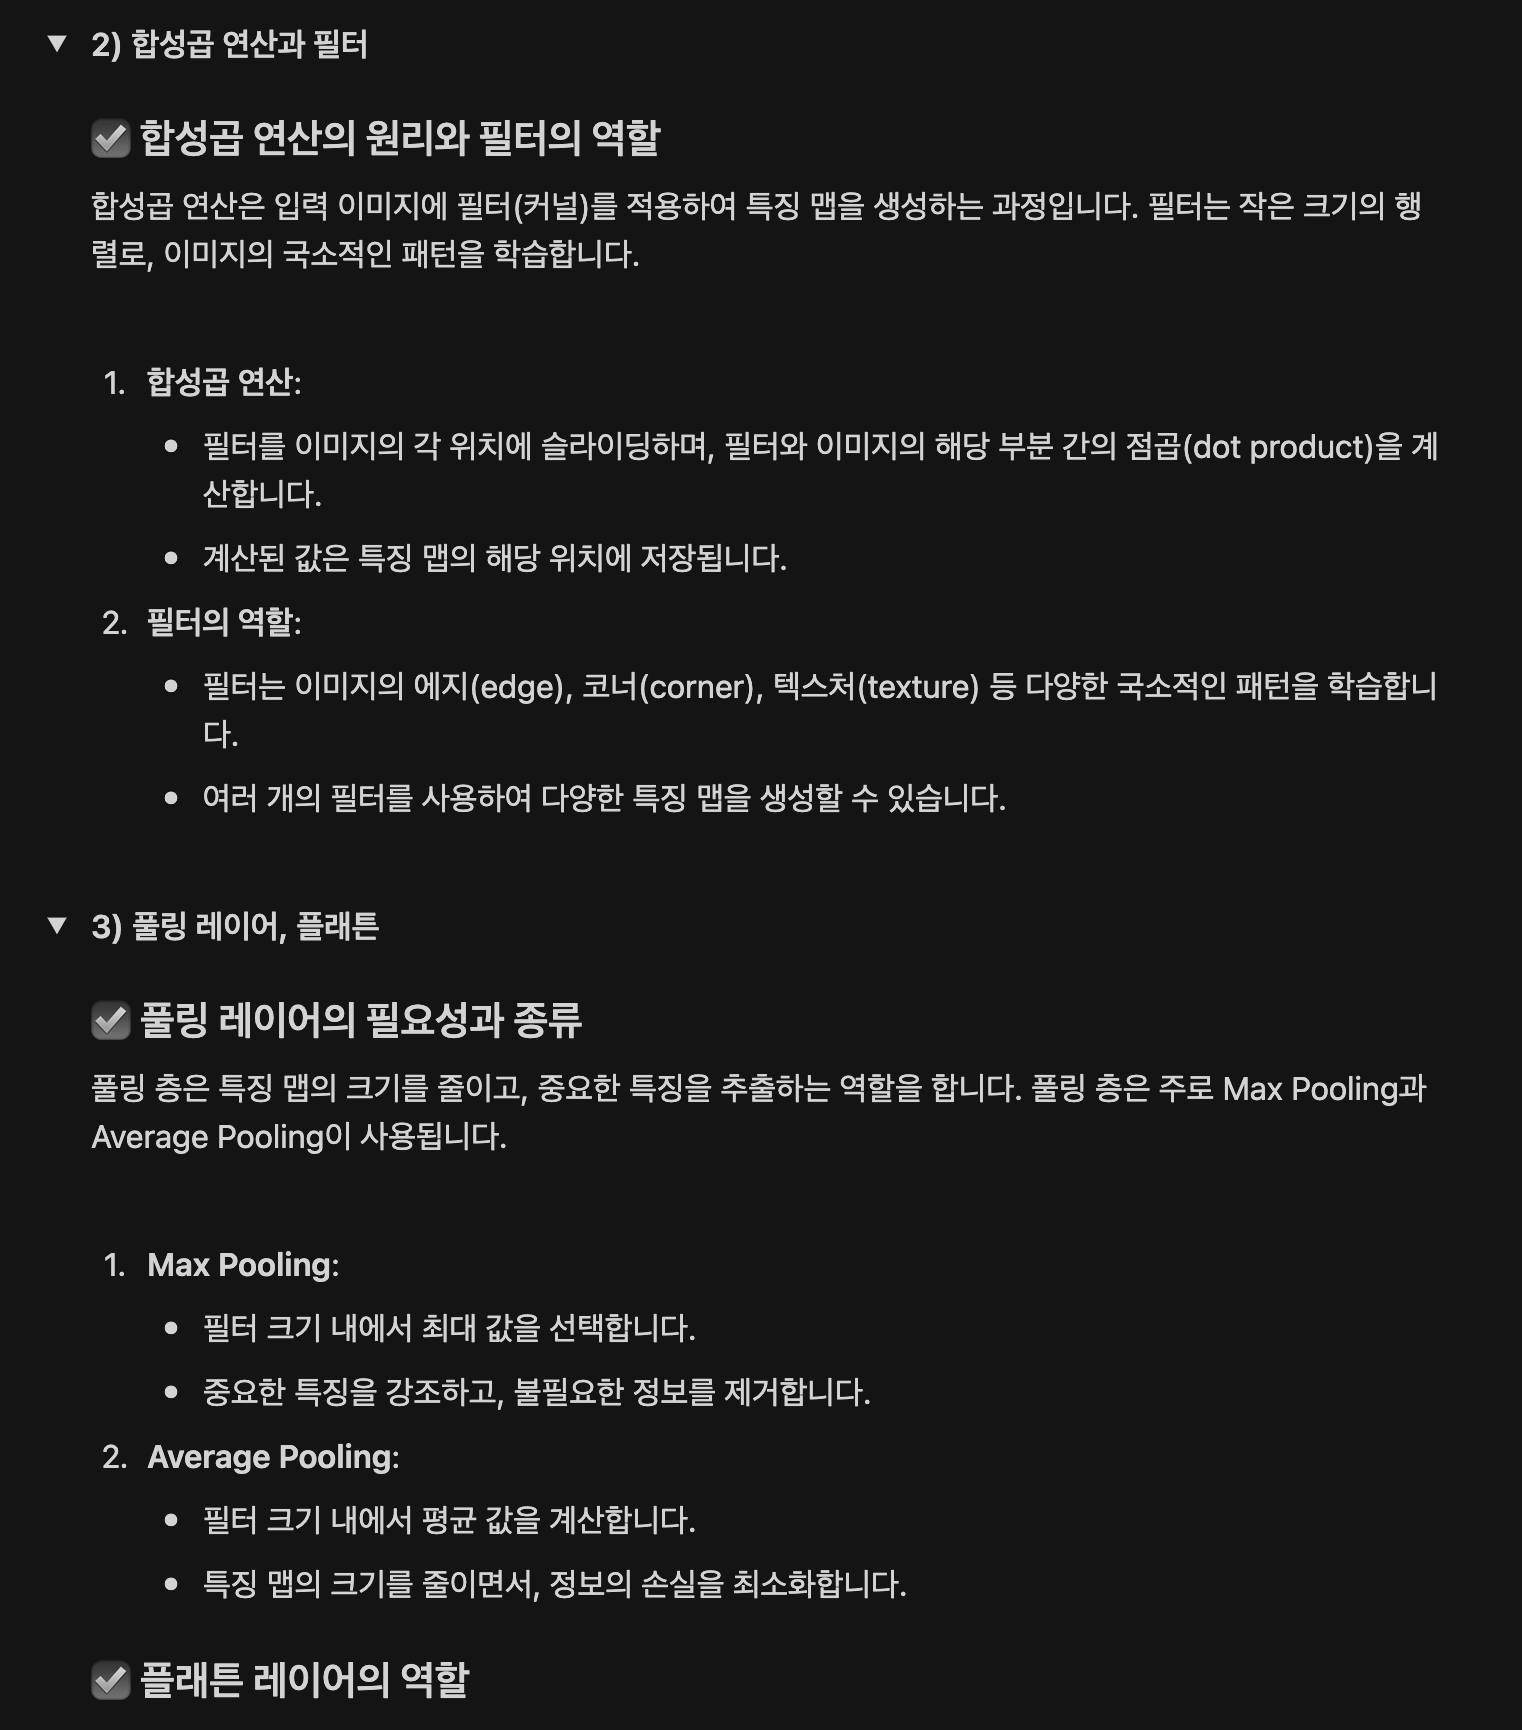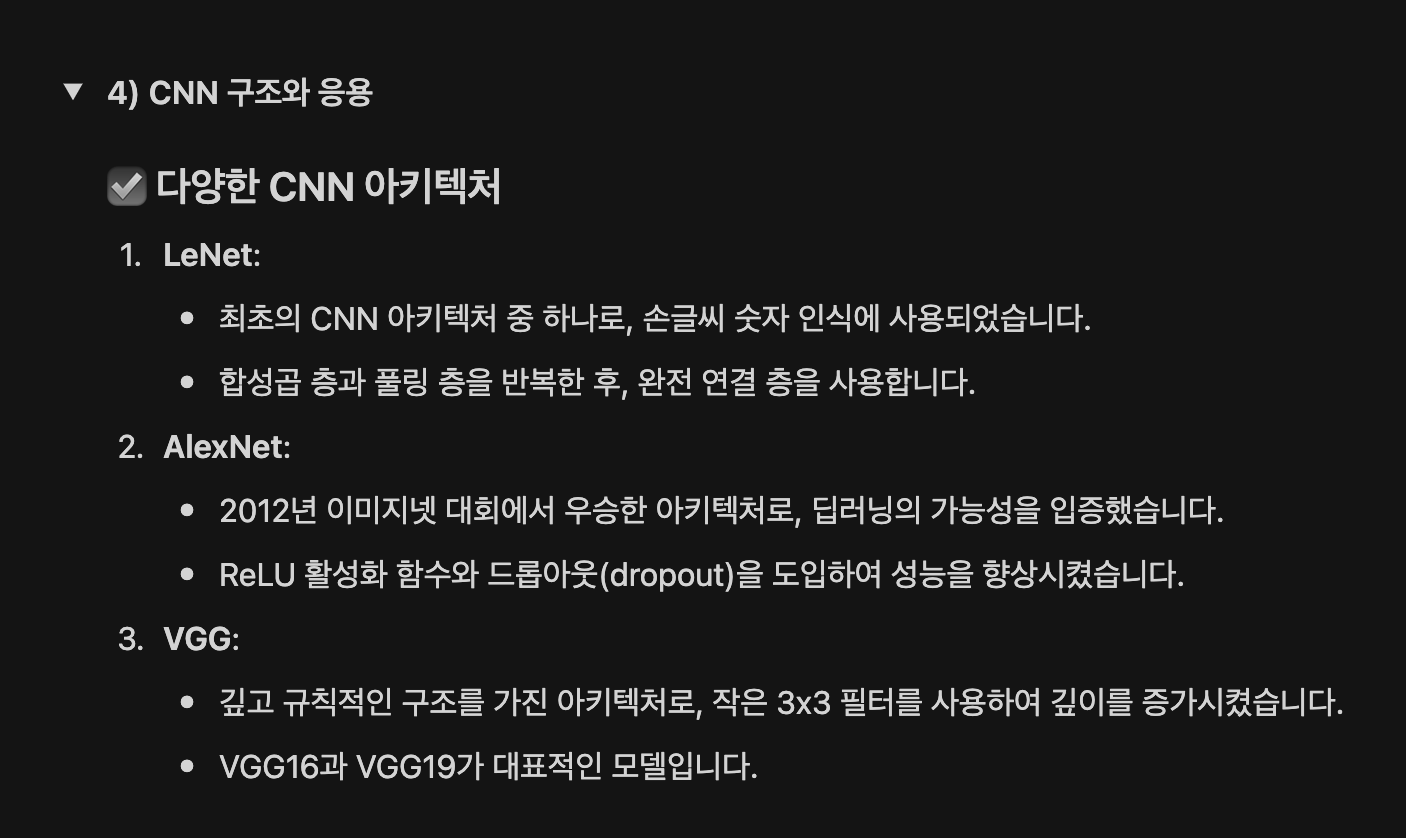

In [1]:
# PyTorch 및 필요한 라이브러리 임포트
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
# 데이터셋 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR-10 데이터셋 로드
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
#간단한 CNN 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # 입력 채널 3, 출력 채널 32, 커널 크기 3x3
        self.pool = nn.MaxPool2d(2, 2)               # 풀링 크기 2x2
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1) # 입력 채널 32, 출력 채널 64, 커널 크기 3x3
        self.fc1 = nn.Linear(64 * 8 * 8, 512)        # 완전 연결 층
        self.fc2 = nn.Linear(512, 10)                # 출력 층 (10개의 클래스)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  # 플래튼 : 차원을 한차원 낮춰주는거 차원을 펴주는거        
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

'''
- `nn.Conv2d`: 2차원 합성곱 층을 정의합니다.
    - $\scriptsize\textsf{nn.Conv2d(in\_channels, out\_channels, kernel\_size, padding)은 입력 채널 수, 출력 채널 수, 커널 크기, 패딩을 지정}$
- `nn.MaxPool2d`: 2차원 최대 풀링 층을 정의합니다.
    - $\scriptsize\textsf{nn.MaxPool2d(kernel\_size, stride)은 풀링 크기와 스트라이드를 지정합니다.}$
- `view`: 텐서의 크기를 변경합니다.
    - $\scriptsize\textsf{x.view(-1, 64 * 8 * 8)은 특징 맵을 1차원 벡터로 변환합니다.}$
'''

In [4]:
## 모델 학습
# 모델 초기화
model = SimpleCNN()

# 손실 함수와 최적화 알고리즘 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 모델 학습
for epoch in range(10):  # 10 에포크 동안 학습
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # 기울기 초기화
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 손실 출력
        running_loss += loss.item()
        if i % 100 == 99:  # 매 100 미니배치마다 출력
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

'''
- `nn.CrossEntropyLoss`: 다중 클래스 분류 문제에서 주로 사용되는 손실 함수입니다. 예측 값과 실제 값 사이의 교차 엔트로피 손실을 계산합니다.
- `optim.SGD`: 확률적 경사 하강법(Stochastic Gradient Descent) 최적화 알고리즘을 정의합니다.
    - $\scriptsize\textsf{lr은 학습률, momentum은 모멘텀 값을 지정합니다.}$
- `optimizer.zero_grad()`: 이전 단계에서 계산된 기울기를 초기화합니다.
- `loss.backward()`: 역전파를 통해 기울기를 계산합니다.
- `optimizer.step()`: 계산된 기울기를 바탕으로 가중치를 업데이트합니다.
'''

[Epoch 1, Batch 100] loss: 2.129
[Epoch 1, Batch 200] loss: 1.746
[Epoch 1, Batch 300] loss: 1.550
[Epoch 1, Batch 400] loss: 1.469
[Epoch 1, Batch 500] loss: 1.348
[Epoch 1, Batch 600] loss: 1.309
[Epoch 1, Batch 700] loss: 1.293
[Epoch 2, Batch 100] loss: 1.152
[Epoch 2, Batch 200] loss: 1.117
[Epoch 2, Batch 300] loss: 1.067
[Epoch 2, Batch 400] loss: 1.081
[Epoch 2, Batch 500] loss: 1.038
[Epoch 2, Batch 600] loss: 1.012
[Epoch 2, Batch 700] loss: 0.982
[Epoch 3, Batch 100] loss: 0.884
[Epoch 3, Batch 200] loss: 0.878
[Epoch 3, Batch 300] loss: 0.865
[Epoch 3, Batch 400] loss: 0.834
[Epoch 3, Batch 500] loss: 0.842
[Epoch 3, Batch 600] loss: 0.832
[Epoch 3, Batch 700] loss: 0.835
[Epoch 4, Batch 100] loss: 0.702
[Epoch 4, Batch 200] loss: 0.694
[Epoch 4, Batch 300] loss: 0.695
[Epoch 4, Batch 400] loss: 0.708
[Epoch 4, Batch 500] loss: 0.688
[Epoch 4, Batch 600] loss: 0.678
[Epoch 4, Batch 700] loss: 0.685
[Epoch 5, Batch 100] loss: 0.563
[Epoch 5, Batch 200] loss: 0.535
[Epoch 5, 

In [5]:
# 모델평가
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')
'''
- `torch.no_grad()`: 평가 단계에서는 기울기를 계산할 필요가 없으므로, 이를 비활성화하여 메모리 사용을 줄입니다.
- `torch.max`: 텐서의 최대 값을 찾습니다.
    - $\scriptsize\textsf{torch.max(outputs.data, 1)은 각 샘플에 대해 가장 높은 확률을 가진 클래스를 반환합니다.}$
- `labels.size(0)`: 배치 크기를 반환합니다.
- `(predicted == labels).sum().item()`: 예측 값과 실제 값이 일치하는 샘플의 수를 계산합니다.
'''

Accuracy of the network on the 10000 test images: 73.34%
